In [9]:

import matplotlib.pyplot as plt
import os
import random
import pickle
import cv2
import numpy as np

In [10]:
DATA_DIR = r'D:\giga projects\three_faces'
CATEGORIES = ['gates', 'musk', 'trump']
BATCH_SIZE = 32
IMG_SIZE = 224

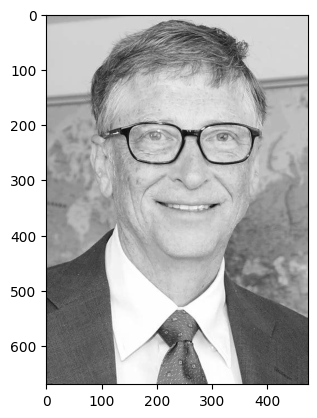

In [11]:
for category in CATEGORIES:
  path = os.path.join(DATA_DIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    break
  break

In [12]:
training_dataset = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_dataset.append([new_array, class_num])

create_training_data()

In [20]:
random.shuffle(training_dataset)
X = []
Y = []

for features, labels in training_dataset:
    X.append(features)
    Y.append(labels)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [21]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

